In [1]:
import sys
sys.path.insert (0 , '/home/arpit/study/ML/github')

In [2]:
import mglearn 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
#plotting the datap point
def plot_data_points(X , y):
    class0 = np.ones((0 , 2))
    class1 = np.ones((0 , 2))
    for indices in range(X.shape[0]):
        if (y[indices] == 0):
            class0 = np.vstack((class0 , np.array(X[indices])))
        else:
            class1 = np.vstack((class1 , np.array(X[indices])))
    plt.plot(class0[: , 0] , class0[: , 1] ,'ob' ,linewidth = 0 , label = "class 0")
    plt.plot(class1[: , 0] , class1[: , 1] , 'or' , linewidth = 0 , label = "class 1")
    
    line = np.linspace(-15 , 15 , 100)
    plt.plot(line , np.zeros(line.shape) , c = 'black')
    line2 = np.linspace(-10 , 10 , 100)
    plt.plot(np.zeros(line2.shape) , line2 , c = 'black')
    plt.xlabel('Feature 1')
    plt.ylabel("feature 2")

Text(0.5,1,'Original data points')

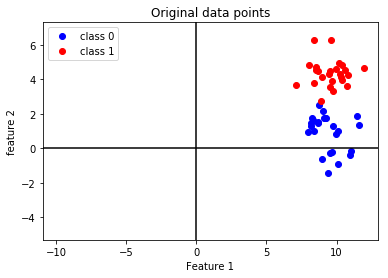

In [4]:
#visualising different type of scaling
from sklearn.datasets import make_blobs
X , y = make_blobs (n_samples = 50 , centers = 2 , random_state = 4 , cluster_std = 1)
plot_data_points(X , y)

maxx = np.abs(X[: , 0].max())
maxy = np.abs(X[: , 1].max())

plt.xlim(-maxx + 1 , maxx + 1)
plt.ylim(-maxy + 1 , maxy + 1)
#plt.grid()
plt.legend()
plt.title("Original data points")

In [5]:
#exploring and applying each data transformations
#standard scaler - It ensures that for each feature the mean is 0 and variance is 1 
#                - Bringing all the features to the same magnitude
#                - this scaling does not ensure any particular minimum and maximum values for the features

#Robust scaler   - It is the same as standard scaler
#                - But this one makes use of the median and the quartiles
#                - The robust scaler usually ignores the data points that are very different from the rest
#                - i.e. the outliers

#MinMax scaler   - Shift the data such that all features are exactly between  1 and 0

#normalizer      - Each scales each data point such that the feature vector have the euclidean length of 1
#                - It projects a data point on the circle of radius 1
#                - This is used when only the direction of the data point matters



(-2, 2)

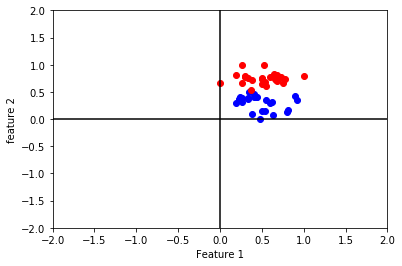

In [6]:
#using minmaxscaller
#sets the min and max to be 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
plot_data_points(X_scaled , y)

plt.xlim(-2 , 2)
plt.ylim(-2 , 2)


(-2, 2)

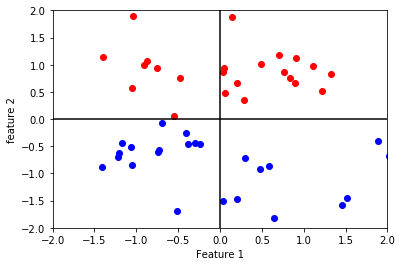

In [7]:
#using the stabdard scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
plot_data_points(X_scaled , y)

plt.xlim(-2 , 2)
plt.ylim(-2 , 2)


(-2, 2)

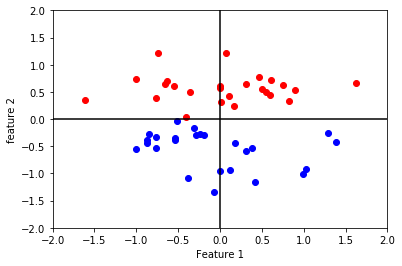

In [8]:
#This one uses the median and interquantile as in standardScaler
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
plot_data_points(X_scaled , y)

plt.xlim(-2 , 2)
plt.ylim(-2 , 2)


(-2, 2)

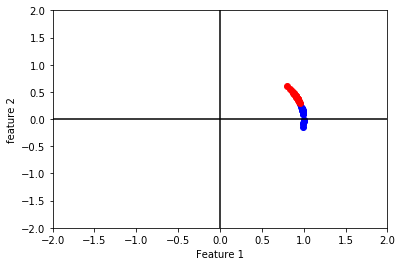

In [9]:
#All the points are on the circle of radius 1
#Only the dircetion matter in this case
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(X)
X_scaled = scaler.transform(X)
plot_data_points(X_scaled , y)

plt.xlim(-2 , 2)
plt.ylim(-2 , 2)


In [10]:
#applying this on the cancer data set
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train , X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state = 1)

print("Shape of X_train is : " , X_train.shape)
print("Shape of X_test is : " , X_test.shape)

Shape of X_train is :  (426, 30)
Shape of X_test is :  (143, 30)


In [11]:
#importing the min max scaler
#scaling uses the formula 
# X_std =( X - X.min(axis = 0) ) / (X.max(axis = 0) - X.min(axis = 0))
#X_scaled = (X_std * (max - min )) + min

#calling the scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
#fitting the data 
#For the MinMaxScaler, the fit method computes the minimum and maximum value of each feature
scaler.fit(X_train)


MinMaxScaler(copy=True, feature_range=(0, 1))

In [13]:
#to apply the transformation that we just learned, that is to actually scale the training data, use tranform method
#The transform method is used in scikit learn whenever a model returns a new representation of the data
X_train_scaled = scaler.transform(X_train)
print("Transformed shape : " , X_train_scaled.shape)
print("Per feature minimum before scaling : \n" , X_train.min(axis = 0))
print("Per feature maximum before scaling : \n" , X_train.max(axis = 0))
print("per feature minimum after scaling :  \n" , X_train_scaled.min(axis = 0))
print("per feature maximum after scaling : \n" , X_train_scaled.max(axis = 0) )
#The transformed data has the same shape as the original data 
#the features are simply shifted and scaled

Transformed shape :  (426, 30)
Per feature minimum before scaling : 
 [6.981e+00 9.710e+00 4.379e+01 1.435e+02 5.263e-02 1.938e-02 0.000e+00
 0.000e+00 1.060e-01 5.024e-02 1.153e-01 3.602e-01 7.570e-01 6.802e+00
 1.713e-03 2.252e-03 0.000e+00 0.000e+00 9.539e-03 8.948e-04 7.930e+00
 1.202e+01 5.041e+01 1.852e+02 7.117e-02 2.729e-02 0.000e+00 0.000e+00
 1.566e-01 5.521e-02]
Per feature maximum before scaling : 
 [2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 2.867e-01 4.268e-01
 2.012e-01 3.040e-01 9.575e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 6.146e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 9.379e-01 1.170e+00 2.910e-01
 5.774e-01 1.486e-01]
per feature minimum after scaling :  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
per feature maximum after scaling : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [14]:
#To apply the SVM , we also need to tranform the test set
X_test_scaled = scaler.transform(X_test)
print("Per feature minimum after scaling : \n" , X_test_scaled.min(axis = 0))
print("Per feature maximum after scaling : \n" , X_test_scaled.max(axis = 0))
#for some of the data point , the min and max is not 0 and 1
#some of the points are even outside 0 and 1
#This is because the scaler applies the same transformation

Per feature minimum after scaling : 
 [ 0.0336031   0.0226581   0.03144219  0.01141039  0.14128374  0.04406704
  0.          0.          0.1540404  -0.00615249 -0.00137796  0.00594501
  0.00430665  0.00079567  0.03919502  0.0112206   0.          0.
 -0.03191387  0.00664013  0.02660975  0.05810235  0.02031974  0.00943767
  0.1094235   0.02637792  0.          0.         -0.00023764 -0.00182032]
Per feature maximum after scaling : 
 [0.9578778  0.81501522 0.95577362 0.89353128 0.81132075 1.21958701
 0.87956888 0.9333996  0.93232323 1.0371347  0.42669616 0.49765736
 0.44117231 0.28371044 0.48703131 0.73863671 0.76717172 0.62928585
 1.33685792 0.39057253 0.89612238 0.79317697 0.84859804 0.74488793
 0.9154725  1.13188961 1.07008547 0.92371134 1.20532319 1.63068851]


In [15]:
#It is important to apply the same transformation to the training and the test set for the supervised model to work
#if we are not using the same transformation , this will happen
X , _ = make_blobs (n_samples=50 , centers = 5 , random_state= 4 , cluster_std = 2)
X_train , X_test = train_test_split(X , random_state = 5 , test_size = .1)
#test size shows the portion of the data to be in the test set
print("Shape of X_train : " , X_train.shape)
print("Shape of X_test :" , X_test.shape)

Shape of X_train :  (45, 2)
Shape of X_test : (5, 2)


Text(0.5,1,'Original data')

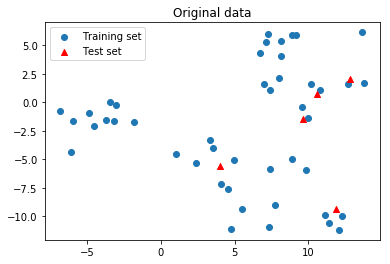

In [16]:
#plotting the data points
plt.scatter(X_train[: , 0] , X_train[: , 1] , marker = 'o' , label = "Training set")
plt.scatter(X_test[: , 0] , X_test[: , 1] , c = 'r' , marker = '^' , label= "Test set")
plt.legend()
plt.title('Original data')

In [17]:
#scaling the data using the min max scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5,1,'Correctly scaled data')

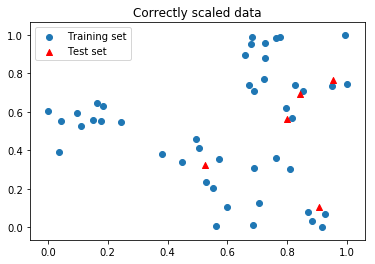

In [18]:
#visualise the properly scale data
plt.scatter(X_train_scaled[: , 0] , X_train_scaled[ : , 1] , marker = 'o' , label = 'Training set')
plt.scatter(X_test_scaled[: , 0] , X_test_scaled[: , 1] , c= 'r' , marker = '^' , label = 'Test set')
plt.legend()
plt.title("Correctly scaled data")

In [19]:
#rescale the test set separately
#so that there min and max is 0 and 1
test_scaler = MinMaxScaler()
test_scaler.fit(X_test)
X_test_scaled_badly = test_scaler.transform(X_test)

Text(0.5,1,'wrongly scaled data')

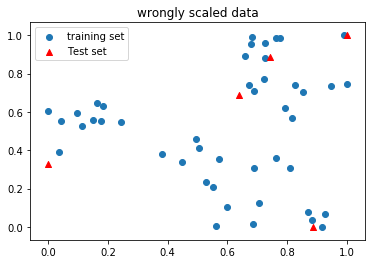

In [20]:
#wrongly scaled data
plt.scatter(X_train_scaled[: , 0] , X_train_scaled[: , 1] , marker = 'o' , label = "training set")
plt.scatter(X_test_scaled_badly [: , 0] , X_test_scaled_badly[: , 1], marker = '^' , c = 'r' , label = "Test set")
plt.legend()
plt.title("wrongly scaled data")

In [21]:
#effect of preporocessing on cancer data set
X_train ,X_test , y_train , y_test = train_test_split(cancer.data , cancer.target , random_state = 0)
from sklearn.svm import SVC
svm = SVC(C = 100)
svm.fit(X_train , y_train)
print("Training accuracy : " , svm.score(X_train , y_train) )
print("Test accuracy :" , svm.score(X_test , y_test))

Training accuracy :  1.0
Test accuracy : 0.6293706293706294


In [22]:
#Lets scale the data using min max scaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled , y_train)
print("Training accuracy : " , svm.score(X_train_scaled, y_train))
print("Test accuracy :" , svm.score(X_test_scaled , y_test))

Training accuracy :  0.9859154929577465
Test accuracy : 0.965034965034965


In [23]:
#using the other preprocessing algorithm 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm.fit(X_train_scaled , y_train)
print("Training accuracy : ", svm.score(X_train_scaled , y_train))
print("test accuracy : " , svm.score(X_test_scaled , y_test))

Training accuracy :  1.0
test accuracy :  0.958041958041958
